In [1]:
# Import library utama
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")

PyTorch version: 2.6.0+cu124
Scikit-learn version: 1.2.2


In [2]:
# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Menampilkan nama fitur dan nama target (kelas)
print("Fitur:", iris.feature_names)
print("Kelas:", iris.target_names)
print("Dimensi data (fitur):", X.shape)
print("Dimensi target (label):", y.shape)

Fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Kelas: ['setosa' 'versicolor' 'virginica']
Dimensi data (fitur): (150, 4)
Dimensi target (label): (150,)


In [3]:
# Bagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")

Bentuk X_train: (120, 4)
Bentuk X_test: (30, 4)


In [4]:
# Buat scaler dan terapkan pada data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Konversi data training
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# Konversi data testing
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

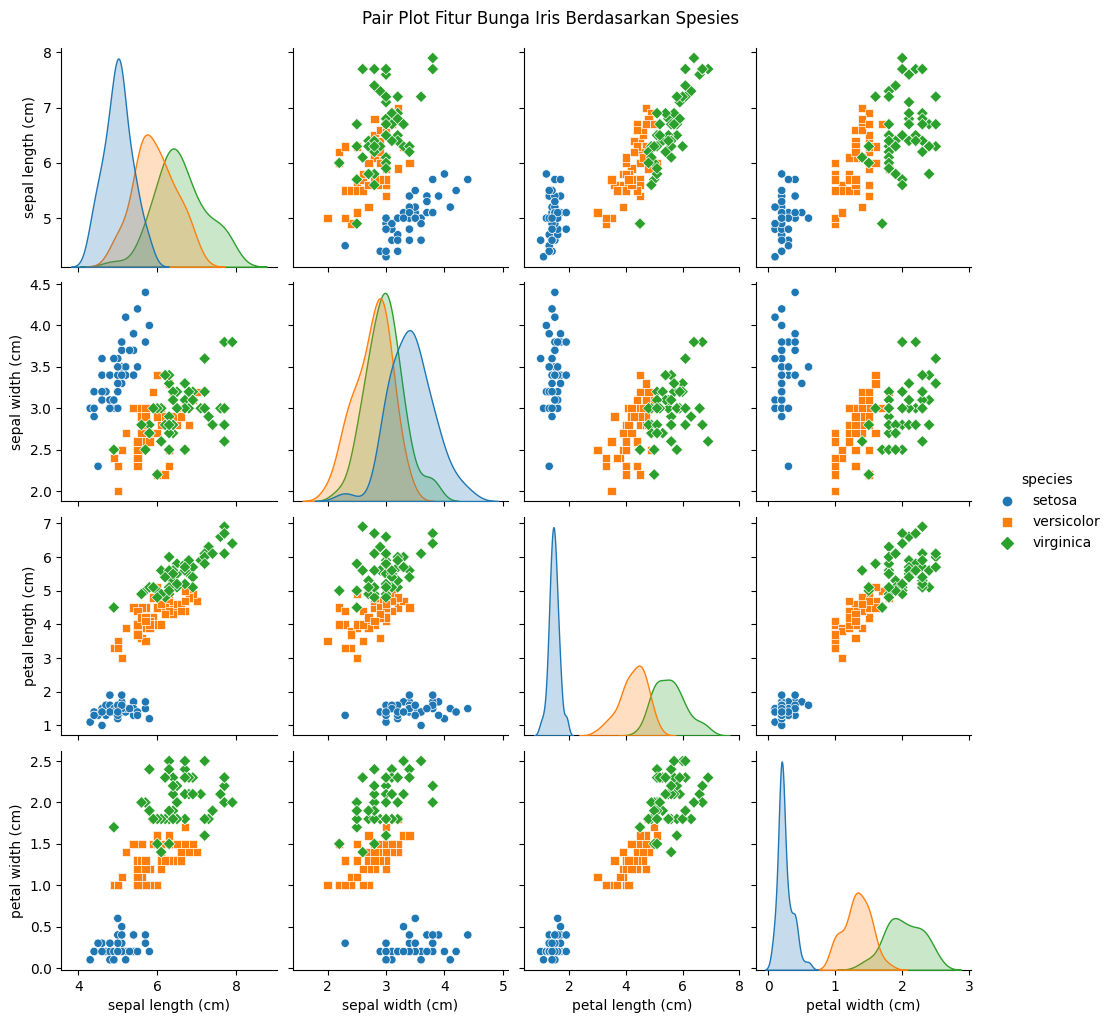

In [6]:
# Buat DataFrame untuk visualisasi yang lebih mudah
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Gunakan pairplot dari Seaborn untuk melihat hubungan antar fitur
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pair Plot Fitur Bunga Iris Berdasarkan Spesies", y=1.02)
plt.show()

In [7]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) # Lapisan input ke hidden
        self.relu = nn.ReLU()                         # Fungsi aktivasi
        self.fc2 = nn.Linear(hidden_size, num_classes) # Lapisan hidden ke output

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        # Tidak perlu Softmax di sini karena nn.CrossEntropyLoss sudah menanganinya
        return out

In [8]:
# Buat dataset PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Buat DataLoader
batch_size = 16
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

Memulai Training MLP...
Epoch [10/100], Loss: 0.1804
Epoch [20/100], Loss: 0.0705
Epoch [30/100], Loss: 0.0632
Epoch [40/100], Loss: 0.0511
Epoch [50/100], Loss: 0.0456
Epoch [60/100], Loss: 0.0384
Epoch [70/100], Loss: 0.0396
Epoch [80/100], Loss: 0.0351
Epoch [90/100], Loss: 0.0325
Epoch [100/100], Loss: 0.0301
Training Selesai!


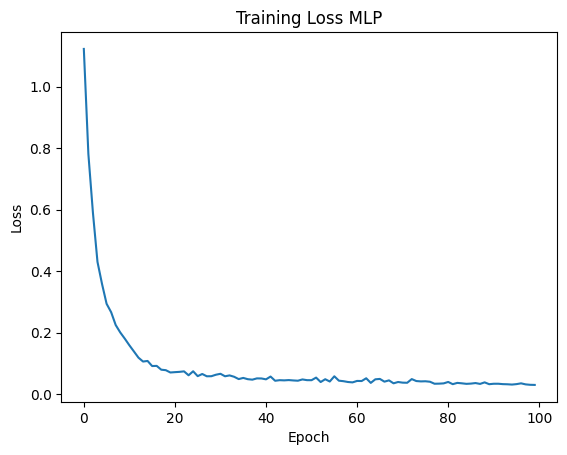

In [9]:
# Inisialisasi model, loss, dan optimizer
input_size = 4
hidden_size = 16 # Anda bisa bereksperimen dengan angka ini
num_classes = 3
mlp_model = MLP(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=learning_rate)

# Training model
num_epochs = 100
train_losses = []

print("Memulai Training MLP...")
for epoch in range(num_epochs):
    epoch_loss = 0
    for features, labels in train_loader:
        # Forward pass
        outputs = mlp_model(features)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_epoch_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}')

print("Training Selesai!")

# Visualisasi loss
plt.figure()
plt.plot(train_losses)
plt.title('Training Loss MLP')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Hasil Evaluasi Model MLP
Akurasi: 0.9667

Laporan Klasifikasi:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



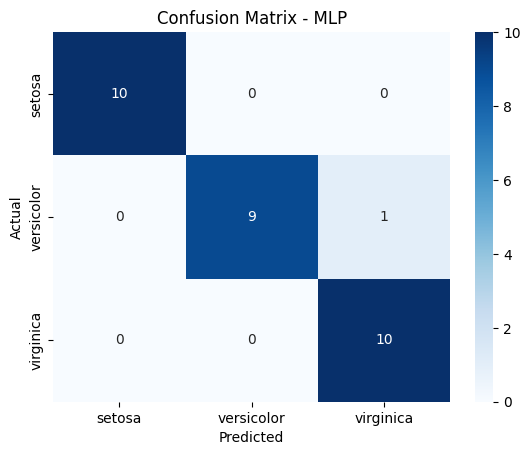

In [10]:
mlp_model.eval() # Set model ke mode evaluasi
with torch.no_grad():
    outputs = mlp_model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)

y_pred_mlp = predicted.numpy()
y_true = y_test_tensor.numpy()

# Tampilkan hasil evaluasi
print("Hasil Evaluasi Model MLP")
print("=========================")
print(f"Akurasi: {accuracy_score(y_true, y_pred_mlp):.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_true, y_pred_mlp, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()

Hasil Evaluasi Model Logistic Regression
Akurasi: 0.9333

Laporan Klasifikasi:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



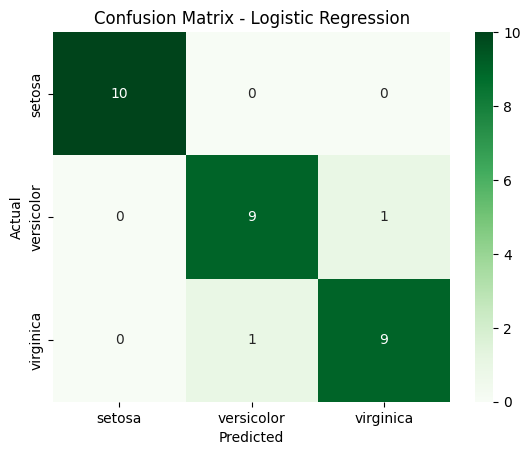

In [11]:
# Buat dan latih model Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Lakukan prediksi
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Tampilkan hasil evaluasi
print("Hasil Evaluasi Model Logistic Regression")
print("========================================")
print(f"Akurasi: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_log_reg, target_names=iris.target_names))

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()